[[1.        ]
 [0.99995   ]
 [0.9998    ]
 ...
 [0.8469637 ]
 [0.85223779]
 [0.85742666]] [[ 0.        ]
 [-0.00999975]
 [-0.0199985 ]
 ...
 [ 0.53164408]
 [ 0.52314807]
 [ 0.51459975]]


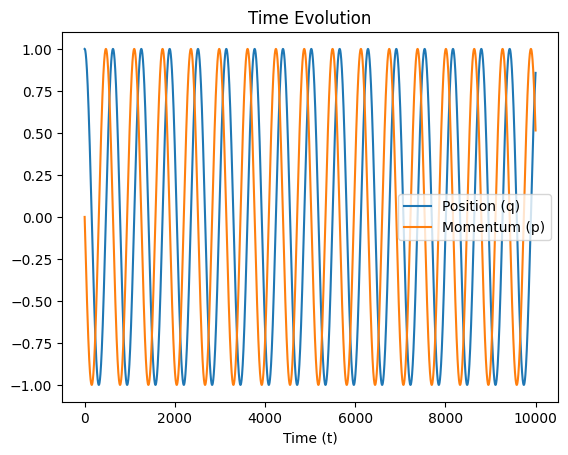

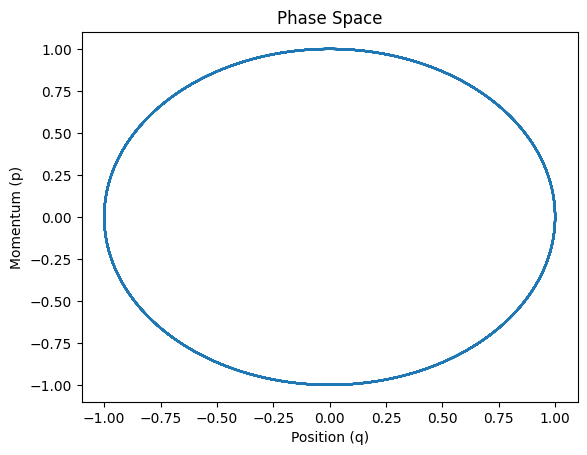

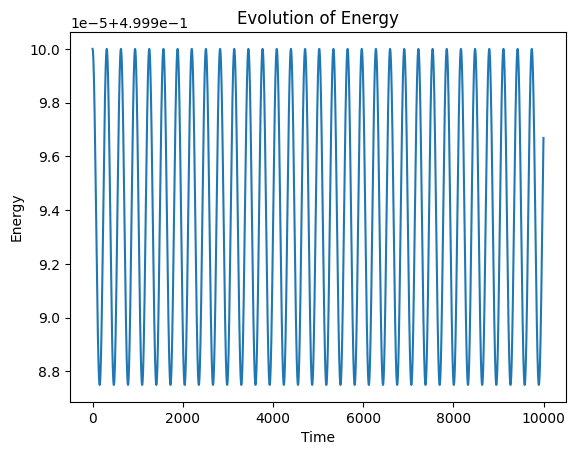

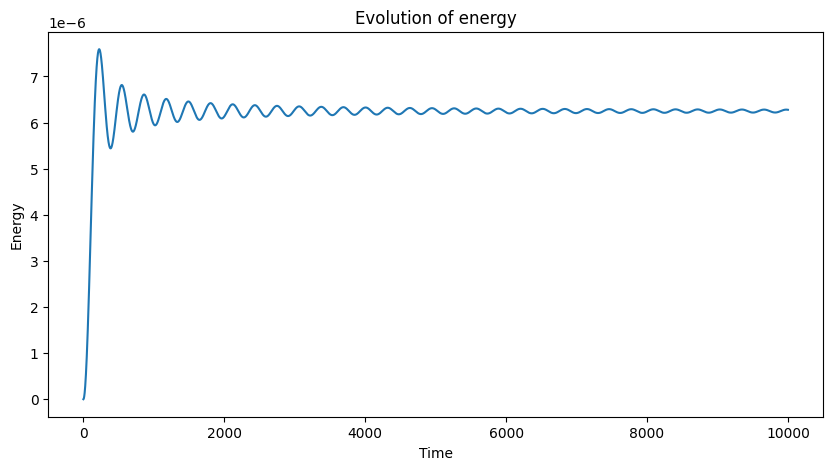

In [13]:
import sys
sys.path.append("..")
import library as lb
import numpy as np
import matplotlib.pyplot as plt
# Functions to be solved
# dq/dt = dH/dp -> q(t+1) = q(t) + dt*dH/dp
# dp/dt = -dH/dq -> p(t+1) = p(t) - dt*dH/dq

dt = 0.01 # time step
steps = 10000 # number of steps

q = np.zeros(steps)
p = np.zeros(steps)

# Initial conditions
q[0] = 1.0
p[0] = 0.0

# Definition of Hamiltonian
H = lambda q, p, k=1.0, m=1.0: 0.5*k*q**2 + 0.5*p**2/m # H = K + V

# Definition of functions
def dHdp(p, m=1.0): # m is the mass
    return p/m

def dHdq(q, k=1.0): # k is 
    return k*q

q, p = lb.stormer_verlet(q[0], p[0], 1, [dHdq], [dHdp], steps, dt)

# Plotting of the Phase Space
plt.plot(q, label="Position (q)")
plt.plot(p, label="Momentum (p)")
plt.xlabel("Time (t)")
plt.legend()
plt.title("Time Evolution")
plt.show()

plt.plot(q, p)
plt.xlabel("Position (q)")
plt.ylabel("Momentum (p)")
plt.title("Phase Space")
plt.show()

plt.plot(H(q, p), label="Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Evolution of Energy")
plt.show()


averages_error = np.zeros(steps)
for i in range(steps):
    averages_error[i] = np.abs(np.mean(H(q[:i], p[:i]))-0.5)

plt.figure(figsize=(10, 5))
plt.plot(averages_error, label="Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Evolution of energy")
plt.show()